In [5]:
# pip install kagglehub

## Download dataset

In [3]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("orvile/airline-market-fare-prediction-data")

print("Path to dataset files:", path)

/home/maria/anaconda3/envs/tct/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/maria/.cache/kagglehub/datasets/orvile/airline-market-fare-prediction-data/versions/1


## Import libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pprint as pp
import seaborn as sns

## Read data

In [5]:
path_file = path + '/Airline_Market_Fare_Prediction_Data/MarketFarePredictionData.csv'
df = pd.read_csv(path_file)
df.head()

,MktCoupons,OriginCityMarketID,DestCityMarketID,OriginAirportID,DestAirportID,Carrier,NonStopMiles,RoundTrip,ODPairID,Pax,...,Circuity,Slot,Non_Stop,MktMilesFlown,OriginCityMarketID_freq,DestCityMarketID_freq,OriginAirportID_freq,DestAirportID_freq,Carrier_freq,ODPairID_freq
0,2,178,152,170,255,6,1807.0,1.0,4035,136.0,...,1.367460,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.022049,0.116826,0.000132
1,2,178,152,170,194,20,1798.0,1.0,4035,136.0,...,1.051724,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.008368,0.307651,0.000132
2,2,178,152,170,260,6,1784.0,0.0,4035,136.0,...,1.034753,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.009366,0.116826,0.000132
3,2,178,152,170,255,6,1807.0,1.0,4035,136.0,...,1.029884,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.022049,0.116826,0.000132
4,2,178,152,170,194,20,1798.0,1.0,4035,136.0,...,1.062291,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.008368,0.307651,0.000132


In [6]:
df.columns

Index(['MktCoupons', 'OriginCityMarketID', 'DestCityMarketID',
       'OriginAirportID', 'DestAirportID', 'Carrier', 'NonStopMiles',
       'RoundTrip', 'ODPairID', 'Pax', 'CarrierPax', 'Average_Fare',
       'Market_share', 'Market_HHI', 'LCC_Comp', 'Multi_Airport', 'Circuity',
       'Slot', 'Non_Stop', 'MktMilesFlown', 'OriginCityMarketID_freq',
       'DestCityMarketID_freq', 'OriginAirportID_freq', 'DestAirportID_freq',
       'Carrier_freq', 'ODPairID_freq'],
      dtype='object')

In [7]:
print('Variables names:', list(df.columns))

Variables names: ['MktCoupons', 'OriginCityMarketID', 'DestCityMarketID', 'OriginAirportID', 'DestAirportID', 'Carrier', 'NonStopMiles', 'RoundTrip', 'ODPairID', 'Pax', 'CarrierPax', 'Average_Fare', 'Market_share', 'Market_HHI', 'LCC_Comp', 'Multi_Airport', 'Circuity', 'Slot', 'Non_Stop', 'MktMilesFlown', 'OriginCityMarketID_freq', 'DestCityMarketID_freq', 'OriginAirportID_freq', 'DestAirportID_freq', 'Carrier_freq', 'ODPairID_freq']


# Exploring dataset

In [8]:
id_like_cols = [
    'OriginCityMarketID', 'DestCityMarketID',
    'OriginAirportID', 'DestAirportID',
    'ODPairID', 'OriginCityMarketID_freq',
    'DestCityMarketID_freq', 'OriginAirportID_freq',
    'DestAirportID_freq', 'Carrier_freq', 'ODPairID_freq'
]

numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col not in id_like_cols]

pseudo_categorical_cols = [col for col in numeric_cols if df[col].nunique() <= 10]

true_numeric_cols = [col for col in numeric_cols if col not in pseudo_categorical_cols]

print(f"Number of rows: {df.shape[0]}, number of columns: {df.shape[1]}")

print("\nTrue numeric columns (excluding IDs and categories):")
print(true_numeric_cols)

print("\nDescriptive statistics for true numeric variables:")
display(df[true_numeric_cols].describe())

print("\nPseudo-categorical variables (numeric type, few unique values):")
for col in pseudo_categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values -> {sorted(df[col].unique())}")

print("\nMissing values (percentage):")
missing_percent = df.isnull().mean() * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))



Number of rows: 1581278, number of columns: 26

True numeric columns (excluding IDs and categories):
['Carrier', 'NonStopMiles', 'Pax', 'CarrierPax', 'Average_Fare', 'Market_share', 'Market_HHI', 'Circuity', 'MktMilesFlown']

Descriptive statistics for true numeric variables:


,Carrier,NonStopMiles,Pax,CarrierPax,Average_Fare,Market_share,Market_HHI,Circuity,MktMilesFlown
count,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06
mean,1.277755e+01,1.183158e+03,1.773202e+05,6.299279e+04,2.144831e+02,4.872004e-01,5.012627e+03,1.026428e+00,1.213717e+03
std,7.785476e+00,7.136535e+02,2.380289e+05,8.802554e+04,7.337322e+01,2.977998e-01,2.494343e+03,1.091917e-01,7.268271e+02
min,0.000000e+00,1.000000e+02,1.000000e+00,1.000000e+00,6.739000e+01,5.001139e-02,1.553420e+03,1.000000e+00,1.020000e+02
25%,4.000000e+00,6.430000e+02,3.182400e+04,1.305200e+04,1.669400e+02,2.367379e-01,3.057060e+03,1.000000e+00,6.580258e+02
50%,1.500000e+01,1.011000e+03,8.654300e+04,3.106800e+04,2.022700e+02,4.273371e-01,4.269820e+03,1.000000e+00,1.040641e+03
75%,2.000000e+01,1.590000e+03,2.318210e+05,7.597000e+04,2.466400e+02,7.170709e-01,6.339910e+03,1.000000e+00,1.639106e+03
max,2.400000e+01,5.095000e+03,1.495396e+06,7.068350e+05,1.265990e+03,1.000000e+00,1.000000e+04,2.985825e+00,5.096521e+03



Pseudo-categorical variables (numeric type, few unique values):
MktCoupons: 3 unique values -> [1, 2, 3]
RoundTrip: 2 unique values -> [0.0, 1.0]
LCC_Comp: 2 unique values -> [0, 1]
Multi_Airport: 2 unique values -> [0, 1]
Slot: 2 unique values -> [0, 1]
Non_Stop: 2 unique values -> [0.0, 1.0]

Missing values (percentage):
Series([], dtype: float64)


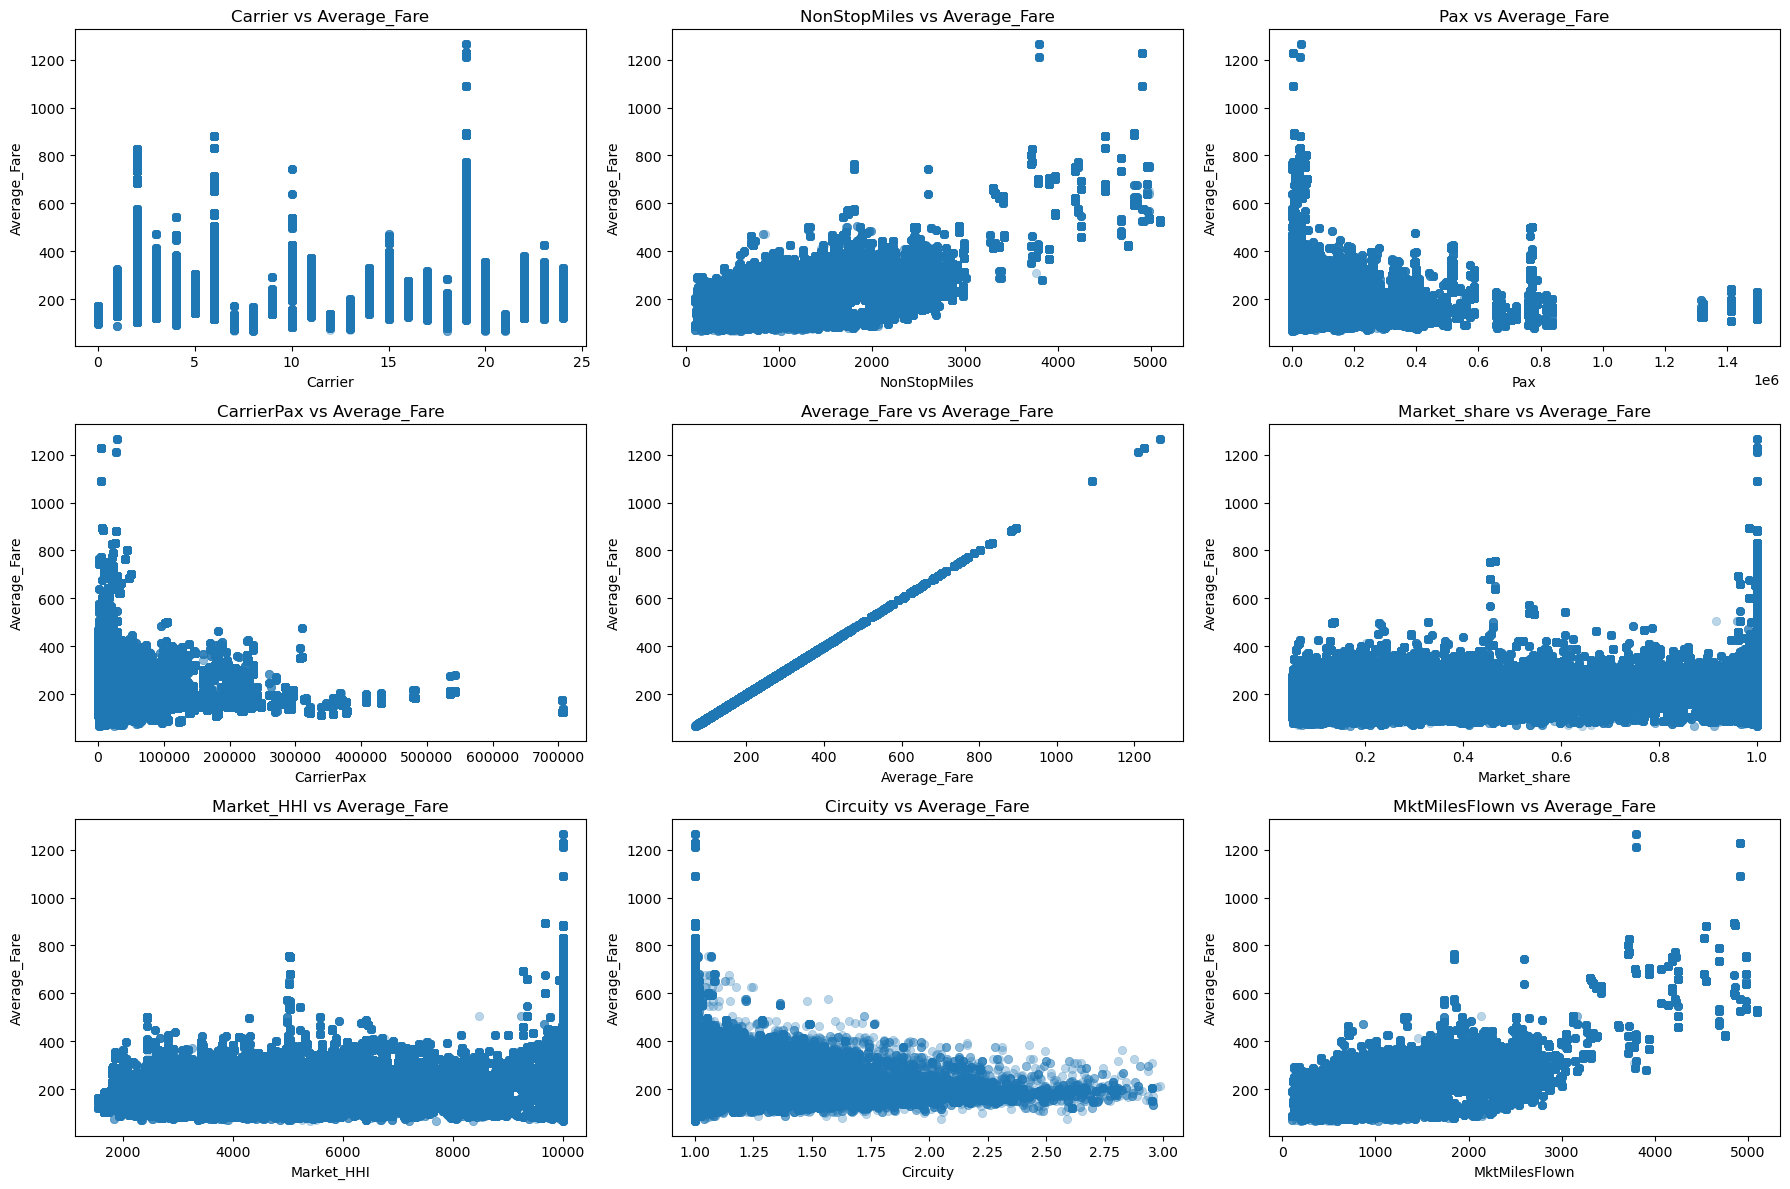

In [9]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(true_numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(data=df, x=true_numeric_cols[i], y='Average_Fare', alpha=0.3, edgecolor=None)
    plt.title(f"{col} vs Average_Fare")
    plt.xlabel(col)
    plt.ylabel("Average_Fare")

plt.tight_layout()
plt.show()



Correlation matrix:
                 Carrier  NonStopMiles       Pax  CarrierPax  Average_Fare  \
Carrier        1.000000     -0.164421 -0.090373   -0.154593     -0.162466   
NonStopMiles  -0.164421      1.000000 -0.038803   -0.060035      0.734829   
Pax           -0.090373     -0.038803  1.000000    0.790826     -0.161839   
CarrierPax    -0.154593     -0.060035  0.790826    1.000000     -0.104272   
Average_Fare  -0.162466      0.734829 -0.161839   -0.104272      1.000000   
Market_share  -0.085741      0.065079 -0.330080    0.009557      0.241951   
Market_HHI    -0.030611      0.089730 -0.415994   -0.215173      0.252886   
Circuity       0.079324     -0.009104 -0.061556   -0.057919      0.035153   
MktMilesFlown -0.154774      0.998268 -0.048107   -0.067977      0.734633   

               Market_share  Market_HHI  Circuity  MktMilesFlown  
Carrier           -0.085741   -0.030611  0.079324      -0.154774  
NonStopMiles       0.065079    0.089730 -0.009104       0.998268  
Pax    

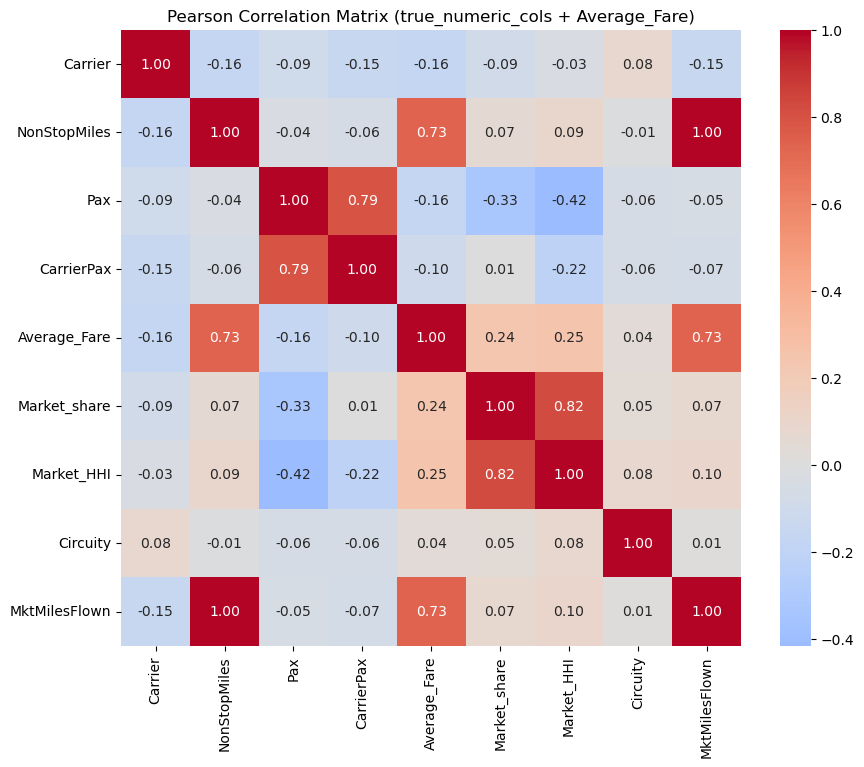


Correlations with Average_Fare:
Average_Fare     1.000000
NonStopMiles     0.734829
MktMilesFlown    0.734633
Market_HHI       0.252886
Market_share     0.241951
Circuity         0.035153
CarrierPax      -0.104272
Pax             -0.161839
Carrier         -0.162466
Name: Average_Fare, dtype: float64


In [10]:
corr_matrix = df[true_numeric_cols].corr()

print("Correlation matrix:\n", corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Pearson Correlation Matrix (true_numeric_cols + Average_Fare)")
plt.show()

print("\nCorrelations with Average_Fare:")
print(corr_matrix['Average_Fare'].sort_values(ascending=False))


Pearson correlation matrix for pseudo-categorical variables with Average_Fare:
                MktCoupons  RoundTrip  LCC_Comp  Multi_Airport      Slot  \
MktCoupons       1.000000  -0.065686  0.087032      -0.048022 -0.062560   
RoundTrip       -0.065686   1.000000 -0.017668      -0.044734 -0.057062   
LCC_Comp         0.087032  -0.017668  1.000000       0.210250  0.056354   
Multi_Airport   -0.048022  -0.044734  0.210250       1.000000  0.244062   
Slot            -0.062560  -0.057062  0.056354       0.244062  1.000000   
Non_Stop        -0.994965   0.067310 -0.087569       0.049704  0.063307   
Average_Fare     0.216857  -0.018065 -0.172588       0.002331  0.004737   

               Non_Stop  Average_Fare  
MktCoupons    -0.994965      0.216857  
RoundTrip      0.067310     -0.018065  
LCC_Comp      -0.087569     -0.172588  
Multi_Airport  0.049704      0.002331  
Slot           0.063307      0.004737  
Non_Stop       1.000000     -0.213996  
Average_Fare  -0.213996      1.000000  

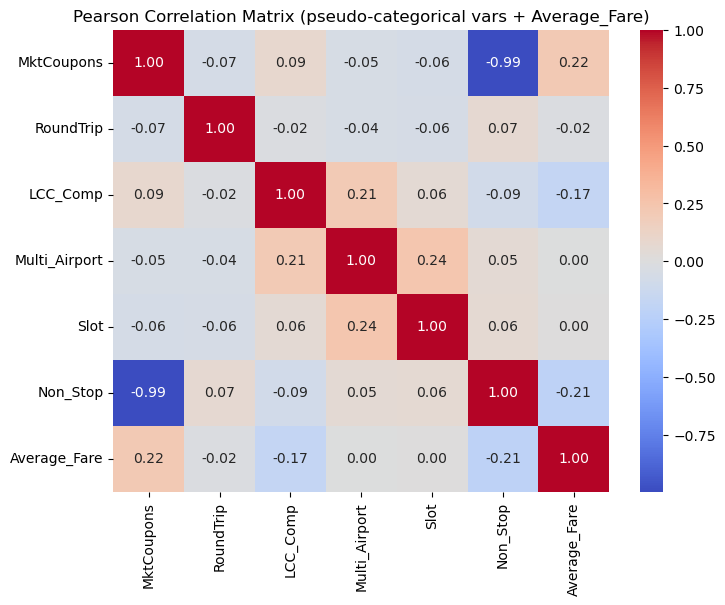

In [11]:

cols_for_corr = pseudo_categorical_cols + ['Average_Fare']

corr_matrix_pseudo = df[cols_for_corr].corr()

print("Pearson correlation matrix for pseudo-categorical variables with Average_Fare:\n", corr_matrix_pseudo)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_pseudo, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Pearson Correlation Matrix (pseudo-categorical vars + Average_Fare)")
plt.show()


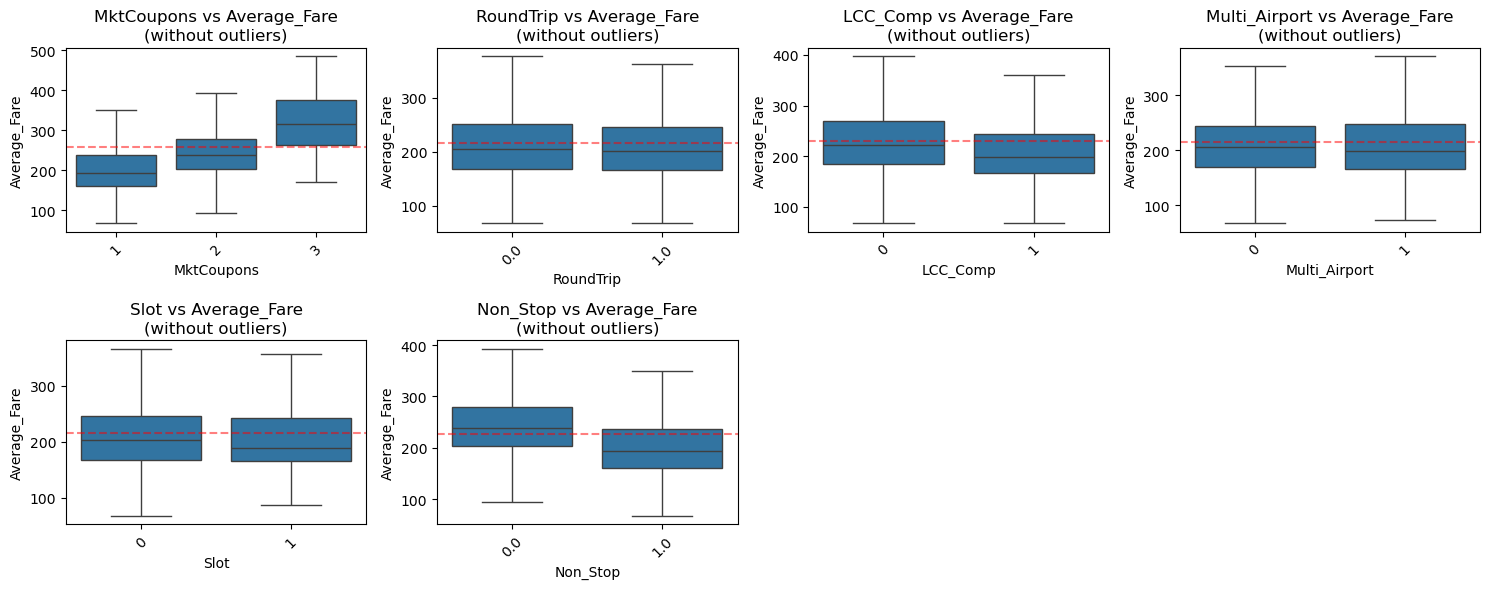

In [12]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(pseudo_categorical_cols):
    plt.subplot(2, len(pseudo_categorical_cols)//2 + 1, i+1)
    
    sns.boxplot(data=df, x=col, y='Average_Fare', showfliers=False)

    means = df.groupby(col)['Average_Fare'].mean()
    plt.axhline(y=means.mean(), color='red', linestyle='--', alpha=0.5)
    
    plt.title(f'{col} vs Average_Fare\n(without outliers)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


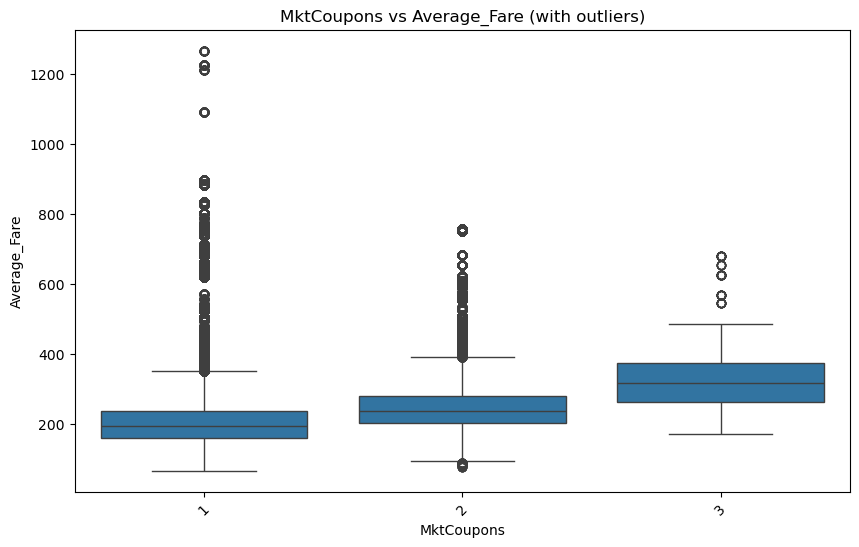

              count    mean  median     min      max
MktCoupons                                          
1           1299905  207.18  193.65   67.39  1265.99
2            278965  247.60  238.07   76.78   756.50
3              2408  321.80  316.35  170.64   678.73


In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='MktCoupons', y='Average_Fare')
plt.title('MktCoupons vs Average_Fare (with outliers)')
plt.xticks(rotation=45)
plt.show()

stats = df.groupby('MktCoupons')['Average_Fare'].agg(['count', 'mean', 'median', 'min', 'max']).round(2)
print(stats)


# ID like variables

ID variables correlations with Average_Fare:
Average_Fare               1.000000
OriginAirportID_freq       0.071089
DestAirportID_freq         0.062646
ODPairID_freq              0.058602
DestCityMarketID           0.057361
ODPairID                   0.047174
OriginCityMarketID         0.047054
OriginCityMarketID_freq    0.038327
DestAirportID              0.032131
DestCityMarketID_freq      0.026944
OriginAirportID            0.021696
Carrier_freq              -0.113316
Name: Average_Fare, dtype: float64


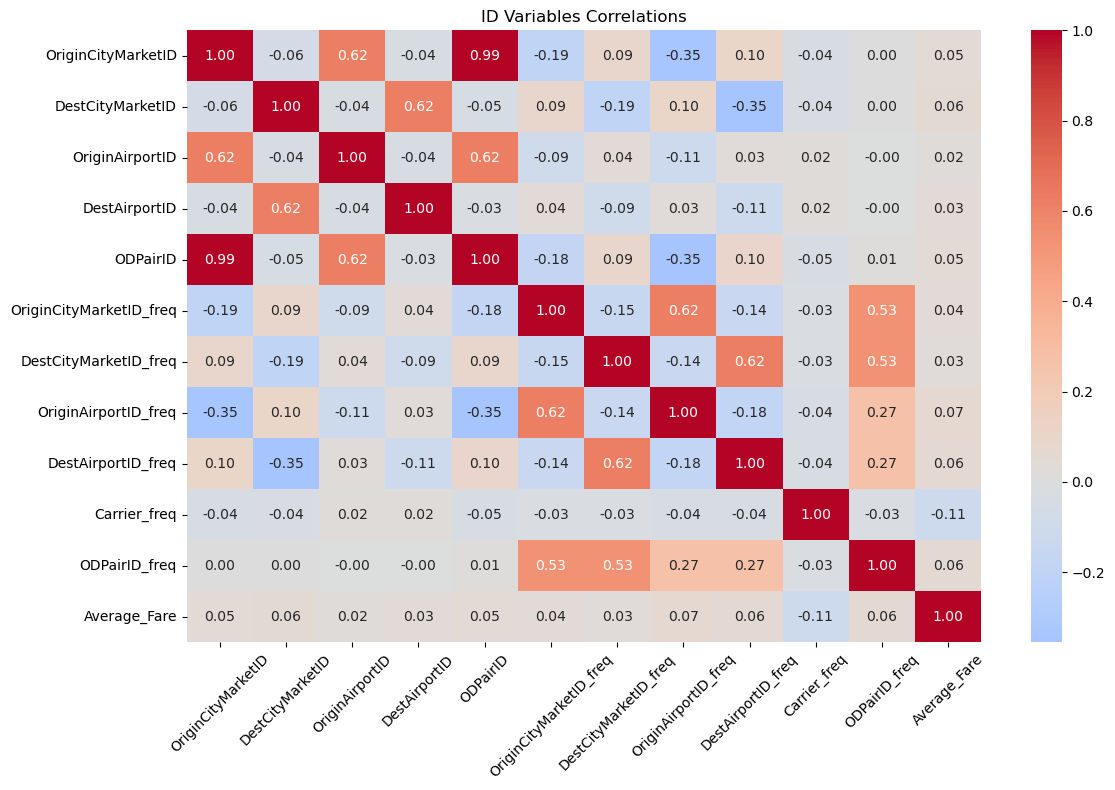

/tmp/ipykernel_10454/2886060874.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), rotation=45)
/tmp/ipykernel_10454/2886060874.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), rotation=45)
/tmp/ipykernel_10454/2886060874.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), rotation=45)
/tmp/ipykernel_10454/2886060874.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), rotation=45)


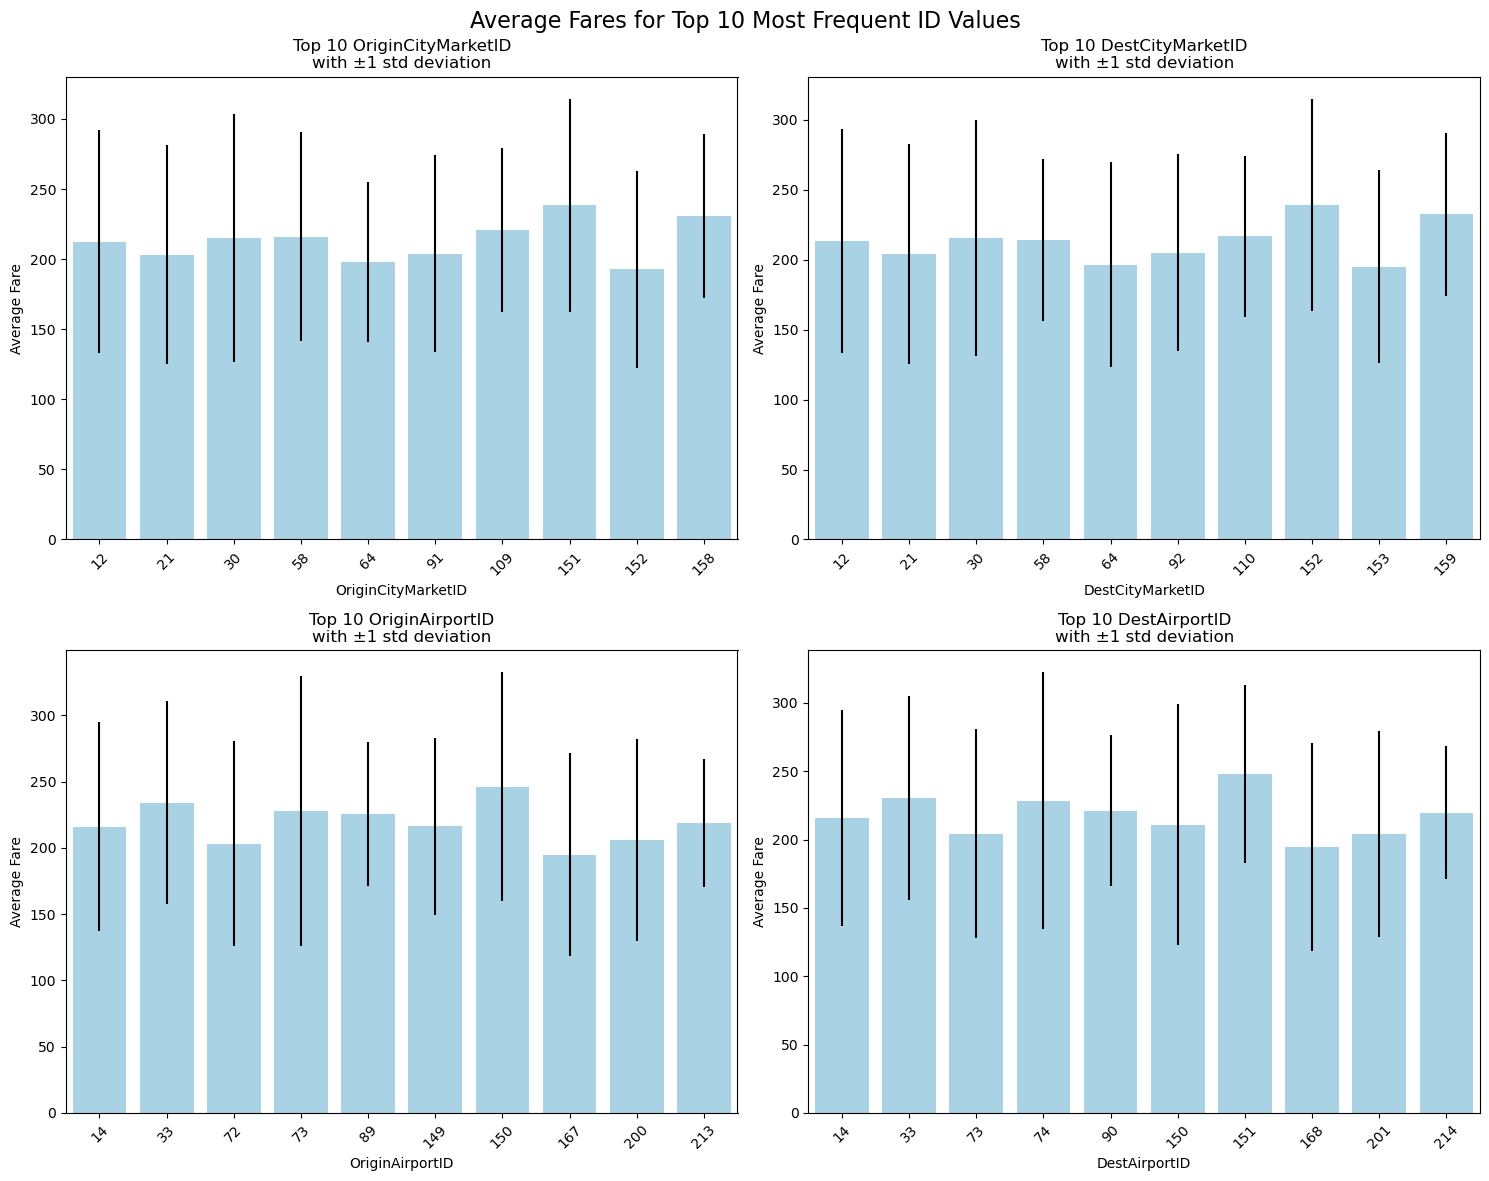

In [14]:
id_cols_with_fare = id_like_cols + ['Average_Fare']
corr_matrix_id = df[id_cols_with_fare].corr()

print("ID variables correlations with Average_Fare:")
print(corr_matrix_id['Average_Fare'].sort_values(ascending=False))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_id, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("ID Variables Correlations")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Average Fares for Top 10 Most Frequent ID Values', fontsize=16)

for idx, col in enumerate(['OriginCityMarketID', 'DestCityMarketID', 'OriginAirportID', 'DestAirportID']):
    i, j = idx // 2, idx % 2
    top_10 = df[col].value_counts().nlargest(10).index
    
    # Calculate means and standard deviations
    stats = df[df[col].isin(top_10)].groupby(col)['Average_Fare'].agg(['mean', 'std']).sort_values('mean', ascending=False)
    
    # Plot bars with error bars
    sns.barplot(x=stats.index, y=stats['mean'], yerr=stats['std'], 
                ax=axes[i,j], capsize=5, color='skyblue', alpha=0.8)
    
    axes[i,j].set_title(f'Top 10 {col}\nwith ±1 std deviation')
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), rotation=45)
    axes[i,j].set_ylabel('Average Fare')

plt.tight_layout()
plt.show()

# Decision tree

Rows before deduplication: 1581278
Rows after deduplication: 63325
Mean Squared Error: $699.05
Root Mean Squared Error: $26.44
Mean Absolute Error: $18.64
R² Score: 0.8735


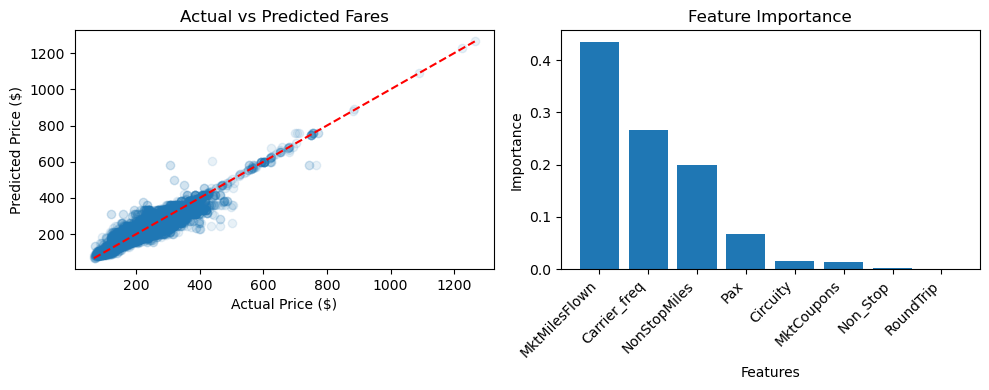

In [ ]:
# Decision Tree Regressor with deduplication
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Select features
features = [
    'MktCoupons', 'NonStopMiles', 'RoundTrip', 'Pax', 
    'Circuity', 'Non_Stop', 'MktMilesFlown', 'Carrier_freq'
]
target = 'Average_Fare'

# Create dataframe with only needed columns and remove duplicates
selected_df = df[features + [target]]
print(f"Rows before deduplication: {len(selected_df)}")
selected_df = selected_df.drop_duplicates()
print(f"Rows after deduplication: {len(selected_df)}")

# Create feature matrix and target vector
X = selected_df[features]
y = selected_df[target]

# Split data (70% train / 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train decision tree regressor
tree_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_reg.fit(X_train, y_train)

# Make predictions
y_pred = tree_reg.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: ${mse:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Visualize actual vs predicted prices
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Fares')

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': tree_reg.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.subplot(1, 2, 2)
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Rows before deduplication: 1581278
Rows after deduplication: 63323
Accuracy: 0.6621

Classification Report:
              precision    recall  f1-score   support

        High       0.59      0.55      0.57      3427
         Low       0.63      0.68      0.65      4804
      Medium       0.62      0.68      0.65      6036
   Very High       0.79      0.69      0.74      2426
    Very Low       0.89      0.71      0.79      2304

    accuracy                           0.66     18997
   macro avg       0.70      0.66      0.68     18997
weighted avg       0.67      0.66      0.66     18997



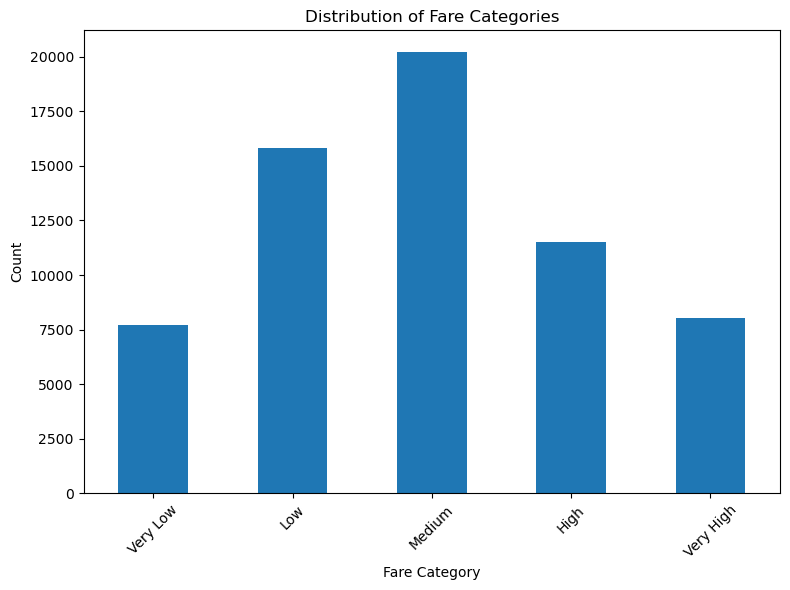

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Select key features
features = ['MktCoupons', 'NonStopMiles', 'RoundTrip', 'Circuity', 
           'Non_Stop', 'MktMilesFlown', 'Carrier_freq']

# Select needed columns and remove duplicates
selected_df = df[features + ['Average_Fare']]
print(f"Rows before deduplication: {len(selected_df)}")
selected_df = selected_df.drop_duplicates()
print(f"Rows after deduplication: {len(selected_df)}")

# Create price bins
bins = [0, 150, 200, 250, 300, np.inf]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
selected_df['fare_category'] = pd.cut(selected_df['Average_Fare'], bins=bins, labels=labels)

# Create feature matrix and target
X = selected_df[features]
y = selected_df['fare_category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train classifier
tree_clf = DecisionTreeClassifier(max_depth=8, random_state=42)
tree_clf.fit(X_train, y_train)

# Evaluate
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize distribution
plt.figure(figsize=(8, 6))
selected_df['fare_category'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Fare Categories')
plt.xlabel('Fare Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
# Select needed columns and remove duplicates
selected_df = df[features + ['Average_Fare']]
print(f"Rows before deduplication: {len(selected_df)}")
selected_df = selected_df.drop_duplicates()
print(f"Rows after deduplication: {len(selected_df)}")

# Check for and handle missing values
print(f"Missing values before handling: {selected_df.isnull().sum().sum()}")
selected_df = selected_df.dropna()  # Remove rows with any NaN values
print(f"Rows after removing NaNs: {len(selected_df)}")

# Create equal-sized price bins using quantiles
n_bins = 5
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
# Calculate quantiles to have equal number of samples in each bin
quantiles = np.linspace(0, 1, n_bins+1)
bins = selected_df['Average_Fare'].quantile(quantiles).values
bin_ranges = [f"${bins[i]:.0f}-${bins[i+1]:.0f}" for i in range(n_bins)]
selected_df['fare_category'] = pd.cut(selected_df['Average_Fare'], bins=bins, labels=labels)

# Print bin ranges for reference
print("Bin ranges (approximately equal counts):")
for i, (label, bin_range) in enumerate(zip(labels, bin_ranges)):
    count = selected_df['fare_category'].value_counts()[label]
    print(f"{label}: {bin_range} ({count} samples)")


Rows before deduplication: 1581278
Rows after deduplication: 63323
Missing values before handling: 0
Rows after removing NaNs: 63323
Bin ranges (approximately equal counts):
Very Low: $67-$169 (12667 samples)
Low: $169-$204 (12668 samples)
Medium: $204-$235 (12676 samples)
High: $235-$274 (12646 samples)
Very High: $274-$1266 (12664 samples)


Rows before deduplication: 1581278
Rows after deduplication: 63323
Accuracy: 0.6083

Classification Report:
              precision    recall  f1-score   support

        High       0.59      0.51      0.55      3735
         Low       0.50      0.54      0.52      3832
      Medium       0.43      0.54      0.48      3829
   Very High       0.79      0.78      0.79      3831
    Very Low       0.83      0.67      0.74      3770

    accuracy                           0.61     18997
   macro avg       0.63      0.61      0.61     18997
weighted avg       0.63      0.61      0.61     18997



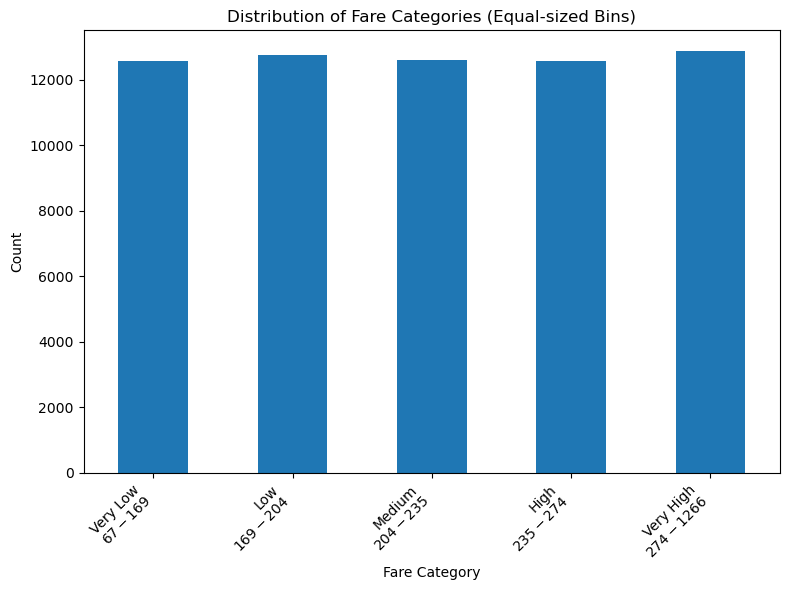

In [40]:
# Select needed columns and remove duplicates
selected_df = df[features + ['Average_Fare']].dropna()  # Added dropna() to handle NaNs
print(f"Rows before deduplication: {len(selected_df)}")
selected_df = selected_df.drop_duplicates()
print(f"Rows after deduplication: {len(selected_df)}")

# Create equal-sized price bins using quantiles
n_bins = 5
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
# Use the bin ranges we already know work from previous output
bins = [67, 169, 204, 235, 274, 1266]
selected_df['fare_category'] = pd.cut(selected_df['Average_Fare'], bins=bins, labels=labels)

# Create feature matrix and target
X = selected_df[features]
y = selected_df['fare_category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train classifier
tree_clf = DecisionTreeClassifier(max_depth=8, random_state=42)
tree_clf.fit(X_train, y_train)

# Evaluate
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize distribution
plt.figure(figsize=(8, 6))
ax = selected_df['fare_category'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Fare Categories (Equal-sized Bins)')
plt.xlabel('Fare Category')
plt.ylabel('Count')

# Add bin ranges to x-tick labels
bin_ranges = ['$67-$169', '$169-$204', '$204-$235', '$235-$274', '$274-$1266']
ax.set_xticklabels([f"{l}\n{r}" for l, r in zip(labels, bin_ranges)], rotation=45, ha='right')
plt.tight_layout()
plt.show()

Rows before deduplication and NaN removal: 1581278
Rows after deduplication and NaN removal: 63325
Explained variance: [0.36925473 0.22154506]
Mean Squared Error: $1834.77
Root Mean Squared Error: $42.83
R² Score: 0.6680
Classification Accuracy (binned predictions): 0.5586
Classification Accuracy (KNN classifier): 0.7329

PCA Components (feature contributions):
     MktCoupons  NonStopMiles  RoundTrip       Pax  Circuity  Non_Stop  \
PC1   -0.522046     -0.397592  -0.044132 -0.020943 -0.199945  0.523404   
PC2   -0.201500      0.530704  -0.052856 -0.062526 -0.503906  0.228651   

     MktMilesFlown  Carrier_freq  
PC1      -0.410981     -0.290116  
PC2       0.512928     -0.318985  


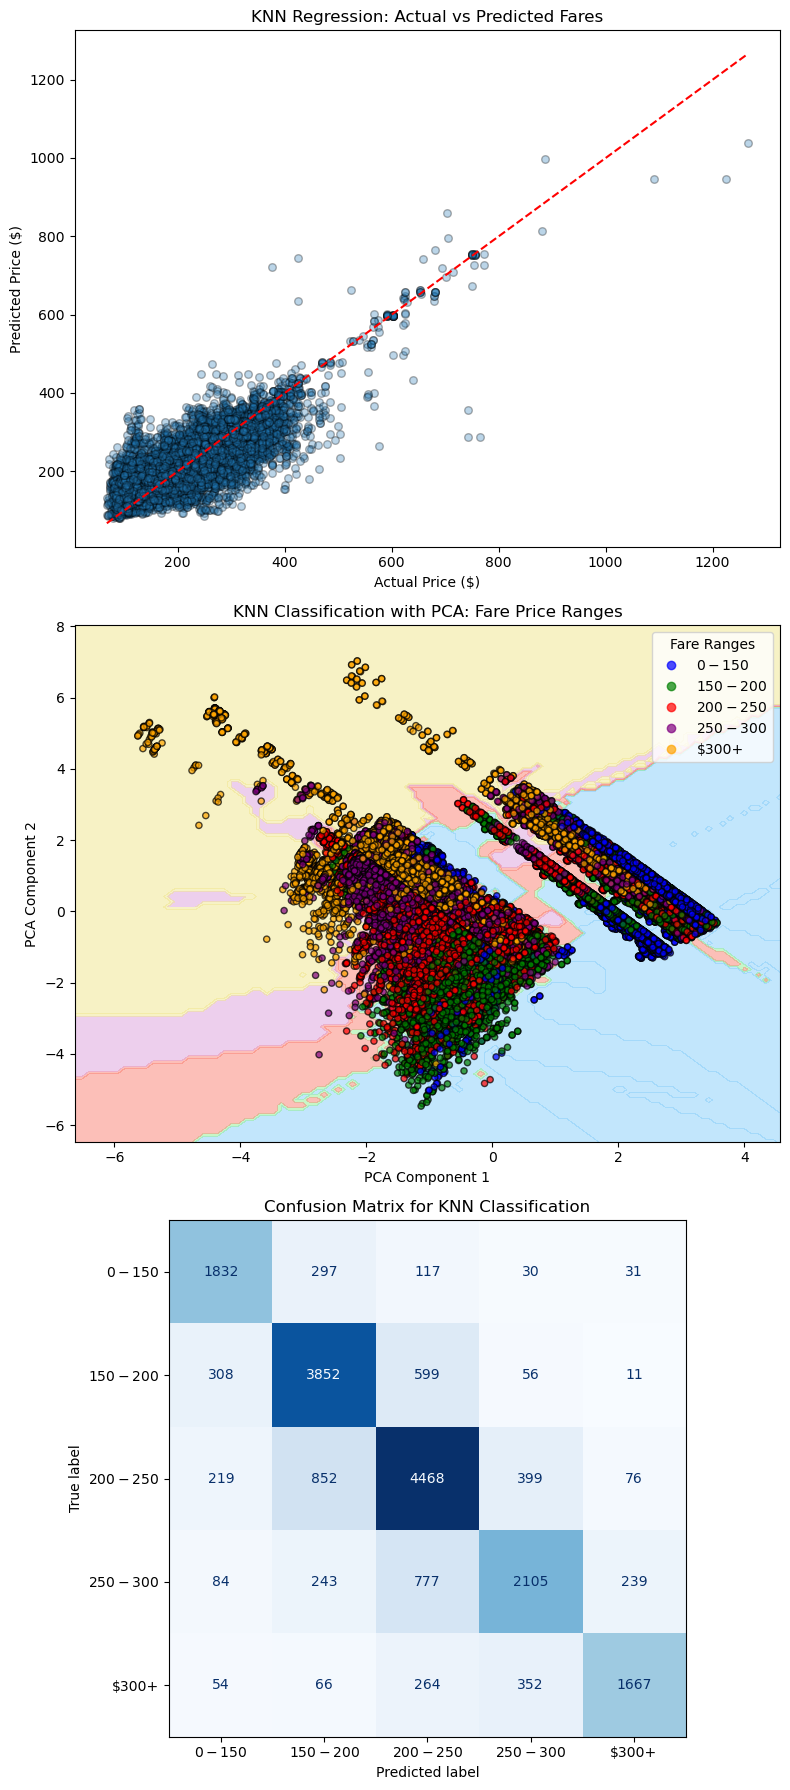

In [44]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

# Select features and target
features = ['MktCoupons', 'NonStopMiles', 'RoundTrip', 'Pax', 
            'Circuity', 'Non_Stop', 'MktMilesFlown', 'Carrier_freq']
target = 'Average_Fare'

# Remove duplicates and NaN values
selected_df = df[features + [target]]
print(f"Rows before deduplication and NaN removal: {len(selected_df)}")
selected_df = selected_df.dropna().drop_duplicates()
print(f"Rows after deduplication and NaN removal: {len(selected_df)}")

# Prepare data
X = selected_df[features].values
y = selected_df[target].values

# Create price bins and labels
bins = [0, 150, 200, 250, 300, np.inf]
labels = ['$0-$150', '$150-$200', '$200-$250', '$250-$300', '$300+']
y_binned = np.digitize(y, bins) - 1

# Define color maps
cmap_light = ListedColormap(['lightskyblue', 'lightgreen', 'salmon', 'plum', 'khaki'])
cmap_bold = ['blue', 'green', 'red', 'purple', 'orange']

# Standardize and reduce dimensions
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Explained variance: {pca.explained_variance_ratio_}")

# Split data
X_train_pca, X_test_pca, y_train, y_test, y_train_bin, y_test_bin = train_test_split(
    X_pca, y, y_binned, test_size=0.3, random_state=42)

# Train KNN regressor (for price prediction)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_pca, y_train)
y_pred = knn_reg.predict(X_test_pca)

# Train KNN classifier (for decision boundaries)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_pca, y_binned)  # Use all data for visualization
y_bin_pred = knn_clf.predict(X_test_pca)  # Predictions for test data

# Evaluate regression
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: ${mse:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Bin the continuous predictions and calculate classification accuracy
y_pred_binned = np.digitize(y_pred, bins) - 1
bin_accuracy = accuracy_score(y_test_bin, y_pred_binned)
print(f"Classification Accuracy (binned predictions): {bin_accuracy:.4f}")

# Direct classifier accuracy
clf_accuracy = accuracy_score(y_test_bin, y_bin_pred)
print(f"Classification Accuracy (KNN classifier): {clf_accuracy:.4f}")

# Create visualization with 3 subplots
fig = plt.figure(figsize=(8, 18))  # Total figure size to fit 3 plots of 8x6 each

# Top plot: Actual vs Predicted
ax1 = fig.add_subplot(3, 1, 1)
ax1.scatter(y_test, y_pred, alpha=0.3, edgecolor='k', s=30)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax1.set_xlabel('Actual Price ($)')
ax1.set_ylabel('Predicted Price ($)')
ax1.set_title('KNN Regression: Actual vs Predicted Fares')

# Middle plot: Decision boundary visualization with PCA
ax2 = fig.add_subplot(3, 1, 2)

# Draw decision boundaries (using all data for prettier visualization)
DecisionBoundaryDisplay.from_estimator(
    knn_clf,
    X_pca,
    ax=ax2,
    cmap=cmap_light,
    response_method="predict",
    alpha=0.5,
    xlabel='PCA Component 1',
    ylabel='PCA Component 2'
)

# Draw points with black edges
scatter = ax2.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=y_binned, 
                     cmap=ListedColormap(cmap_bold), 
                     edgecolor='k', 
                     s=20,
                     alpha=0.7)

# Add legend
ax2.legend(handles=scatter.legend_elements()[0], 
          labels=labels, 
          title="Fare Ranges", 
          loc="best")
ax2.set_title('KNN Classification with PCA: Fare Price Ranges')

# Bottom plot: Confusion Matrix
ax3 = fig.add_subplot(3, 1, 3)
cm = confusion_matrix(y_test_bin, y_bin_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax3, cmap='Blues', colorbar=False)
ax3.set_title('Confusion Matrix for KNN Classification')

# Show PCA component contributions
pc_df = pd.DataFrame(
    pca.components_, 
    columns=features,
    index=['PC1', 'PC2']
)
print("\nPCA Components (feature contributions):")
print(pc_df)

plt.tight_layout()
plt.show()

Rows before deduplication and NaN removal: 1581278
Rows after deduplication and NaN removal: 63325
Explained variance: [0.36925473 0.22154506]
Mean Squared Error: $1834.77
Root Mean Squared Error: $42.83
R² Score: 0.6680
Classification Accuracy (binned predictions): 0.5276
Classification Accuracy (KNN classifier): 0.7172

PCA Components (feature contributions):
     MktCoupons  NonStopMiles  RoundTrip       Pax  Circuity  Non_Stop  \
PC1   -0.522046     -0.397592  -0.044132 -0.020943 -0.199945  0.523404   
PC2   -0.201500      0.530704  -0.052856 -0.062526 -0.503906  0.228651   

     MktMilesFlown  Carrier_freq  
PC1      -0.410981     -0.290116  
PC2       0.512928     -0.318985  


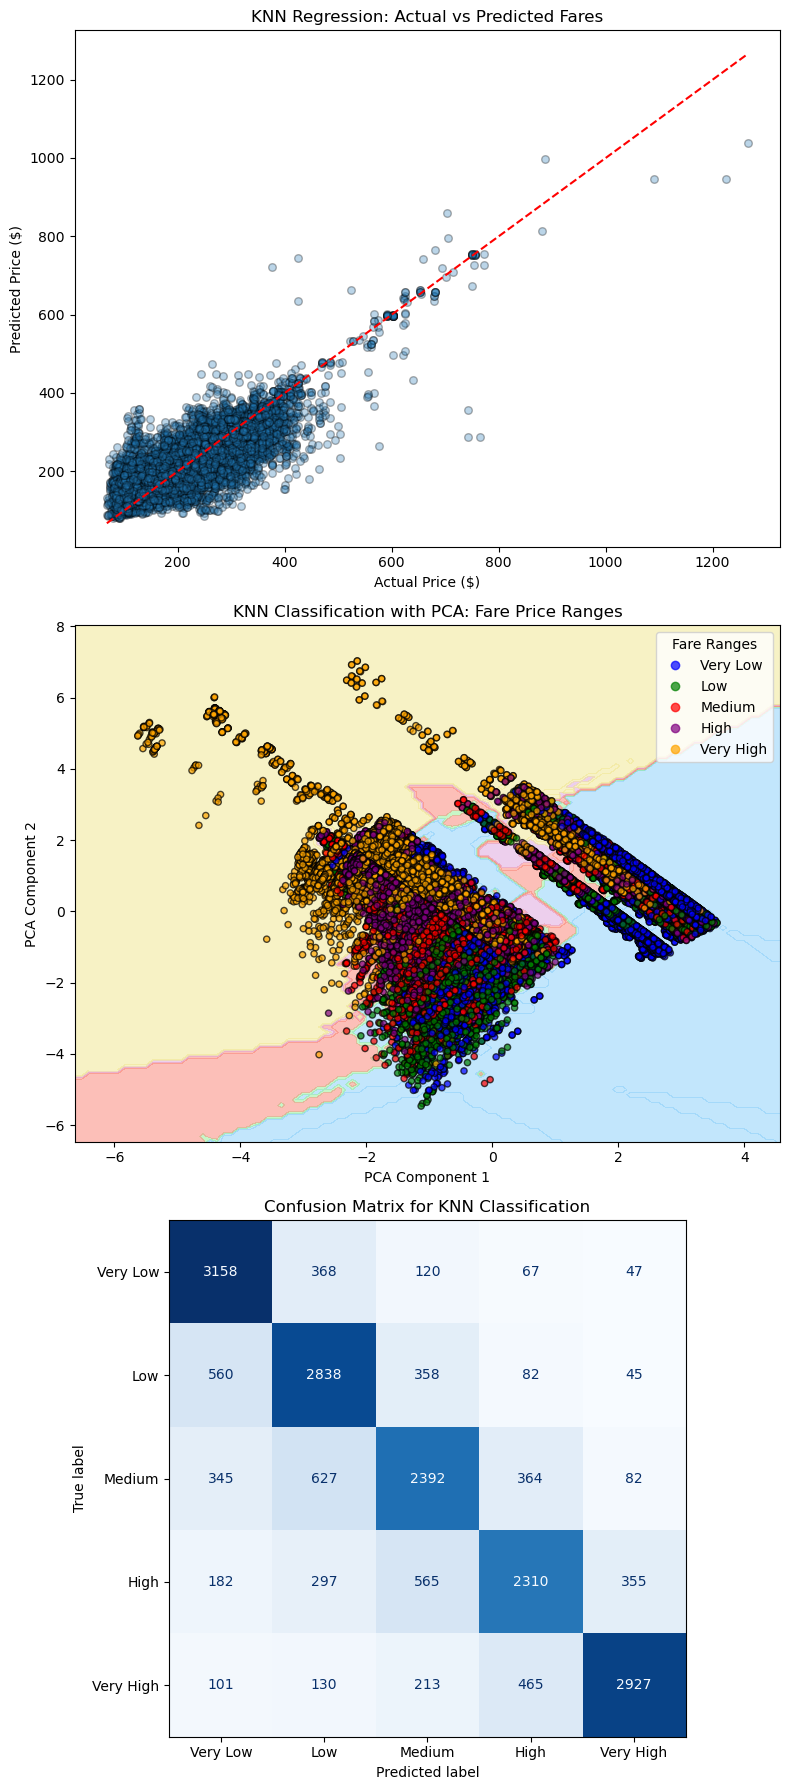

In [ ]:
# Remove duplicates and NaN values
selected_df = df[features + [target]]
print(f"Rows before deduplication and NaN removal: {len(selected_df)}")
selected_df = selected_df.dropna().drop_duplicates()
print(f"Rows after deduplication and NaN removal: {len(selected_df)}")

# Prepare data
X = selected_df[features].values
y = selected_df[target].values

# Equal-sized bins based on quantiles (as seen earlier)
bins = [67, 169, 204, 235, 274, 1266] 
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
y_binned = np.digitize(y, bins) - 1

# Define color maps
cmap_light = ListedColormap(['lightskyblue', 'lightgreen', 'salmon', 'plum', 'khaki'])
cmap_bold = ['blue', 'green', 'red', 'purple', 'orange']

# Standardize and reduce dimensions
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Explained variance: {pca.explained_variance_ratio_}")

# Split data
X_train_pca, X_test_pca, y_train, y_test, y_train_bin, y_test_bin = train_test_split(
    X_pca, y, y_binned, test_size=0.3, random_state=42)

# Train KNN regressor (for price prediction)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_pca, y_train)
y_pred = knn_reg.predict(X_test_pca)

# Train KNN classifier (for decision boundaries)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_pca, y_binned)  # Use all data for visualization
y_bin_pred = knn_clf.predict(X_test_pca)  # Predictions for test data

# Evaluate regression
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: ${mse:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Bin the continuous predictions and calculate classification accuracy
y_pred_binned = np.digitize(y_pred, bins) - 1
bin_accuracy = accuracy_score(y_test_bin, y_pred_binned)
print(f"Classification Accuracy (binned predictions): {bin_accuracy:.4f}")

# Direct classifier accuracy
clf_accuracy = accuracy_score(y_test_bin, y_bin_pred)
print(f"Classification Accuracy (KNN classifier): {clf_accuracy:.4f}")

# Create visualization with 3 subplots
fig = plt.figure(figsize=(8, 18))  # Total figure size to fit 3 plots of 8x6 each

# Top plot: Actual vs Predicted
ax1 = fig.add_subplot(3, 1, 1)
ax1.scatter(y_test, y_pred, alpha=0.3, edgecolor='k', s=30)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax1.set_xlabel('Actual Price ($)')
ax1.set_ylabel('Predicted Price ($)')
ax1.set_title('KNN Regression: Actual vs Predicted Fares')

# Middle plot: Decision boundary visualization with PCA
ax2 = fig.add_subplot(3, 1, 2)

# Draw decision boundaries (using all data for prettier visualization)
DecisionBoundaryDisplay.from_estimator(
    knn_clf,
    X_pca,
    ax=ax2,
    cmap=cmap_light,
    response_method="predict",
    alpha=0.5,
    xlabel='PCA Component 1',
    ylabel='PCA Component 2'
)

# Draw points with black edges
scatter = ax2.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=y_binned, 
                     cmap=ListedColormap(cmap_bold), 
                     edgecolor='k', 
                     s=20,
                     alpha=0.7)

# Add legend
ax2.legend(handles=scatter.legend_elements()[0], 
          labels=labels, 
          title="Fare Ranges", 
          loc="best")
ax2.set_title('KNN Classification with PCA: Fare Price Ranges')

# Bottom plot: Confusion Matrix
ax3 = fig.add_subplot(3, 1, 3)
cm = confusion_matrix(y_test_bin, y_bin_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax3, cmap='Blues', colorbar=False)
ax3.set_title('Confusion Matrix for KNN Classification')

# Show PCA component contributions
pc_df = pd.DataFrame(
    pca.components_, 
    columns=features,
    index=['PC1', 'PC2']
)
print("\nPCA Components (feature contributions):")
print(pc_df)

plt.tight_layout()
plt.show()